# Regressions From Scratch
***
## Table of Contents
1. [Loading Data (Linear)](#content1)
2. [Linear Regression](#content2)
3. [Loss Function (MSE)](#content3)
4. [Gradient Descent (Linear)](#content4)
5. [Compare with Scikit-Learn](#content5)
6. [Loading Data (Logistic)](#content6)
7. [Logistic Regression](#content7)
8. [Loss Function (BCE)](#content8)
9. [Gradient Descent (Logistic)](#content9)
***

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

<a class="anchor" id="content1"></a>
## 1. Loading Data (Linear)

In [104]:
linear_data = pd.read_csv("linear_data.txt", header=None)
x_lin = np.array(linear_data.iloc[:, 0])
y_lin = np.array(linear_data.iloc[:, 1])

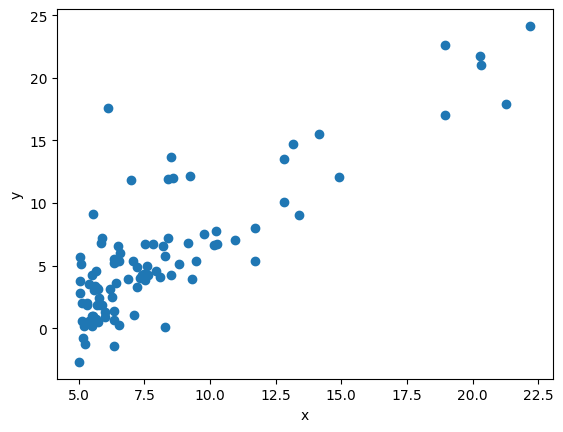

In [105]:
plt.scatter(x_lin, y_lin)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Linear Regression <a class="anchor" id="content2"></a>

Let's say there is a simple linear regression:

\begin{align*}
y = h = wx + b
\end{align*}

Where:

- $x$ is the independent variable,
- $w$ is the slope (weight, coefficient of $x$), and
- $b$ is the intercept (bias, constant term).

A linear regression model provides numerical predictions as a straight line on a dataset, assuming a linear reiatonship between two numerical variables.

In [106]:
# ! Linear function h
def h(w: float, b: float, x: float) -> float:
    return w * x + b

## 3. Loss Function (MSE) <a class="anchor" id="content3"></a>
The loss function (or the cost function) quantifies the error between the predicted values produced by a model and the actual target values from the data. Common loss functions are Mean Squared Error (MSE) for regression problems, and Cross-Entropy Loss for classification tasks.
Here's the equation of MSE:

\begin{align*}
L = \dfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
\end{align*}
Where:
- $y$ is the actual value.
- $\hat{y}$ is the predicted value.
- $n$ is the number of data points

MSE is simply the average squared difference between the actual and the predicted values in the dataset.

In [107]:
# ! Loss function L - Mean Squared Error (MSE)
def calculate_loss_MSE(w: float, b: float, x: np.array, y: np.array) -> float:
    total_err: float = 0.0
    for i in range(len(x)):
        y_hat = h(w, b, x[i])
        total_err += (y[i]-y_hat) ** 2
    return total_err/len(x)

## 4. Gradient Descent (Linear) <a class="anchor" id="content4"></a>


Gradient Descent is an algorithm that tries to find optimised hyperparameters by iteratively searching for a local minima of the loss function. It is one of the most important concepts in machine learning and is used to reduce errors when training models. There are four types of Gradient Descent: **Batch Gradient Descent**, **Stochastic Gradient Descent**, **Mini-Batch Gradient Descent** and **Momentum-Based Gradient Descent**. For practice purposes, the most basic type, **Batch Gradient Descent**, will be used in this notebook.

We compute the derivative (or gradient) of the loss function to determine the slope of the function at a given point. By iteratively adjusting the parameters of the model in the direction opposite to the gradient (gradient descent), the algorithm moves closer to the point where the cost function reaches its minimum value. This occurs when the slope of the function becomes zero, indicating that the gradient has flattened and the cost is minimised. When the slope is steep, we take a big step for each iteration. As we get closer to the optimised value, the step becomes smaller.

\begin{align*}
L &= \dfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 \\
&= \dfrac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2
\end{align*}


By applying the power rule $(f(x)^n)' = n \cdot f(x)^{n-1} \cdot f'(x)$, the derivatives of the loss function $L$ with respect to two different hyperparameters, $w$ and $b$, are described as follows:

\begin{align*}
\dfrac{dL}{dw} &= \dfrac{1}{n} \sum_{n=1}^{n} 2 \cdot (y_i - w x_i -b) \cdot \dfrac{\partial }{\partial w} (y_i - w x_i -b) \\
&= \dfrac{2}{n} \sum_{n=1}^{n} (y_i - w x_i -b) \cdot (-x_i) \\
&= - \dfrac{2}{n} \sum_{n=1}^{n} x_i (y_i - \hat{y_i})^2
\end{align*}



\begin{align*}
\dfrac{dL}{db} &= \dfrac{1}{n} \sum_{n=1}^{n} 2 \cdot (y_i - w x_i -b) \cdot \dfrac{\partial }{\partial b} (y_i - w x_i -b) \\
&= - \dfrac{2}{n} \sum_{n=1}^{n} (y_i - \hat{y_i})^2
\end{align*}

In [108]:
# ! Derivative of cost function L
def derivative_MSE(x: np.array, y: np.array, y_pred: np.array, n: int) -> tuple[float, float]:
    dL_dw: float = -2*np.sum((y - y_pred) * x) / n
    dL_db: float = -2*np.sum(y - y_pred) / n
    return dL_dw, dL_db

In each iteration of the gradient descent (epoch), the derivatives aboves are calculated and the hyperparameters $w$ and $b$ are be updated as:

\begin{align*}
w_{new} = w_{old} - \alpha \cdot \dfrac{\partial L}{\partial w}
\end{align*}

\begin{align*}
b_{new} = b_{old} - \alpha \cdot \dfrac{\partial L}{\partial b}
\end{align*}
where $\alpha$ is called the learning rate, a scaler value that controls the step size of updates during gradient descent.

In [109]:
# ! Batch Gradient Descent
def gradient_descent_linear(w: float, b: float, x: np.array, y: np.array,
                            alpha: float, epochs: int, n: int) -> tuple[float, float, np.array]:
    loss_list: list[float] = []
    for _ in tqdm(range(epochs)):
        y_pred: float = h(w, b, x)
        loss_list.append(calculate_loss_MSE(w, b, x, y))
        dL_dw, dL_db = derivative_MSE(x, y, y_pred, n)
        w -= alpha * dL_dw
        b -= alpha * dL_db
    return w, b, np.array(loss_list)

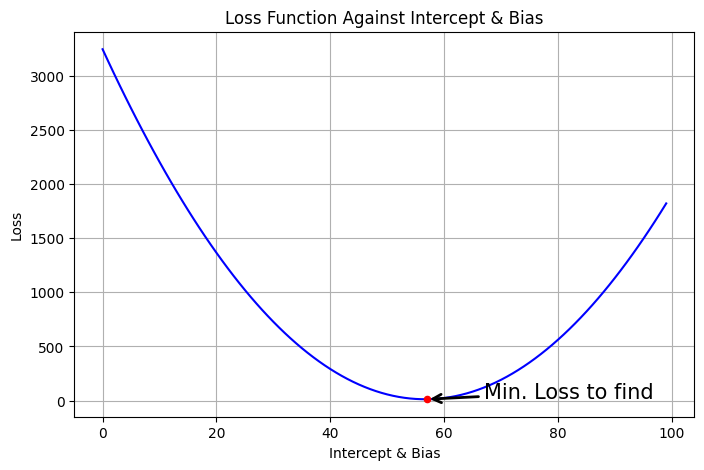

In [110]:
random_w_vals = np.linspace(-5, 5, 100)
random_b_vals = np.linspace(-5, 5, 100)
trace_lf_list = []

for w_val, b_val in zip(random_w_vals, random_b_vals):
    trace_lf_list.append(calculate_loss_MSE(w_val, b_val, x_lin, y_lin))
trace_lf_w = np.array(trace_lf_list)
plt.figure(figsize=(8, 5))
plt.plot(trace_lf_w, color='b')

min_loss_idx = np.argmin(trace_lf_w)
min_loss_value = trace_lf_w[min_loss_idx]
# Add a marker at the minimum value
plt.scatter(min_loss_idx, min_loss_value,
            color="red", marker="o", s=20, zorder=5)
plt.annotate(
    "Min. Loss to find",
    xy=(min_loss_idx, min_loss_value),
    xytext=(min_loss_idx + 10, min_loss_value + 10),  # Adjust arrow placement
    arrowprops=dict(facecolor="black", arrowstyle="->", lw=2),
    fontsize=15,
    color="black",
)
plt.title('Loss Function Against Intercept & Bias')
plt.xlabel('Intercept & Bias')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

By tracing the curve of the loss function using arbitrary values for $w$ and $b$ (100 data points each evenly spaced between -5 and +5), we obtain a quadratic curve due to the squared term in the MSE formula. The red point at the bottom of the curve represents the point where the regression produces the least amount of error. Gradient descent attempts to find a value as close as possible to this point by optimising the hyperparameters.

Let's execute the gradient descent function assuming that $\alpha = 0.01$, $w=5$, and $b=3$.

In [111]:
# * alpha: Learning rate
alpha = 0.01
n = len(y_lin)
epochs = 5000
# * Assume that w = 5 and b = 3
coeff_GD, intercept_GD, loss_array = gradient_descent_linear(
    5, 3, x_lin, y_lin, alpha, epochs, n)
print(f'Coefficient (GD): {coeff_GD:.5f}, Intercept (GD): {intercept_GD:.5f}')

100%|██████████| 5000/5000 [00:00<00:00, 36516.60it/s]

Coefficient (GD): 1.19303, Intercept (GD): -3.89578


According to the obtained results, the optimised coefficient ($w$) and intercept ($b$) for this dataset are 1.19303 and -3.89578 respectively.

Notice that the total loss decreases over epochs as GD iteratively updates the hyperparameters.

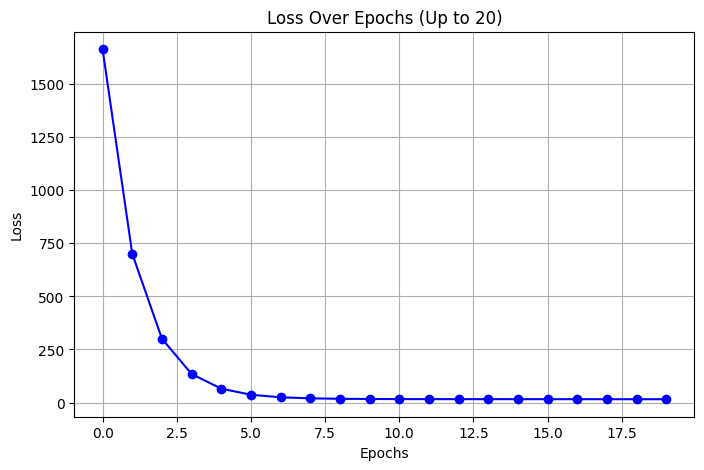

In [112]:
plt.figure(figsize=(8, 5))
plt.plot(loss_array[:20], marker='o', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Up to 20)')
plt.grid(True)
plt.show()

Here's the visualisation of the linear model above with optimised weight and bias.

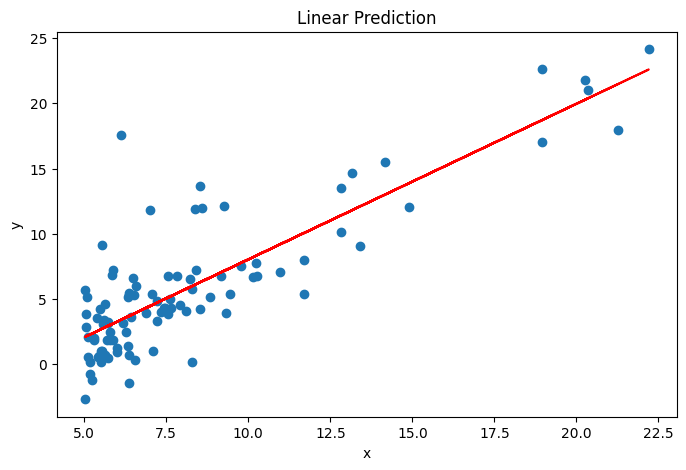

In [113]:
plt.figure(figsize=(8, 5))
plt.scatter(x_lin, y_lin)
plt.plot(x_lin, h(coeff_GD, intercept_GD, x_lin), color="red")
plt.title('Linear Prediction')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 5. Compare with Scikit-Learn <a class="anchor" id="content5"></a>
Scikit-learn is an open source library for machine learning in Python. It provides a plenty of tools that allow us to quickly build machine learning models.

In [114]:
# * For LinearRegression() from scikit-learn library, 2D arrays are expected.
x_sk = x_lin.reshape(-1, 1)
y_sk = y_lin.reshape(-1, 1)

In [115]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_sk, y_sk)

LinearRegression()

In [116]:
# * .items() extracts the scalar value from the array, eliminating the outer brackets.
print(f'Intercept (sklearn): {lr.intercept_.item():.5f}')
print(f'Intercept (GD): {intercept_GD:.5f}')
print(f'Coef. of regression (sklearn): {lr.coef_.item():.5f}')
print(f'Coef. of regression (GD): {coeff_GD:.5f}')

Intercept (sklearn): -3.89578
Intercept (GD): -3.89578
Coef. of regression (sklearn): 1.19303
Coef. of regression (GD): 1.19303


## 6. Loading Data (Logistic) <a class="anchor" id="content6"></a>

In [117]:
data_logistic = pd.read_csv("logistic_data.txt", header=None)
data_logistic.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [118]:
x_1_lgs = np.array(data_logistic.iloc[:, 0])
x_2_lgs = np.array(data_logistic.iloc[:, 1])
y_lgs = np.array(data_logistic.iloc[:, 2])

# Combine features into X with an added bias column (first column)
# X_lgs = np.c_[np.ones(x_1_lgs.shape[0]), x_1_lgs, x_2_lgs]
X_lgs = np.concatenate(
    (np.ones((x_1_lgs.shape[0], 1)),
     x_1_lgs[:, np.newaxis], x_2_lgs[:, np.newaxis]),
    axis=1
)
y_lgs = y_lgs[:, np.newaxis]  # Reshape y for matrix operations
X_lgs.shape, y_lgs.shape

((100, 3), (100, 1))

## 7. Logistic Regression <a class="anchor" id="content7"></a>

Logistic Regression is a machine learning algorithm commonly used for binary classification tasks or predicting the probability of a dicrete or categorical outcome. For binary classification, predictions are obtained by applying the sigmoid function, which takes a numerical independent variable as input and returns a value between 0 and 1. The sigmoid function is represented as:

\begin{align*}
S(z) = \dfrac{1}{1+e^{-z}}
\end{align*}

In [119]:
# ! Implement a sigmoid function
def sigmoid(z: np.array) -> np.array:
    return 1 / (1 + np.exp(-z))

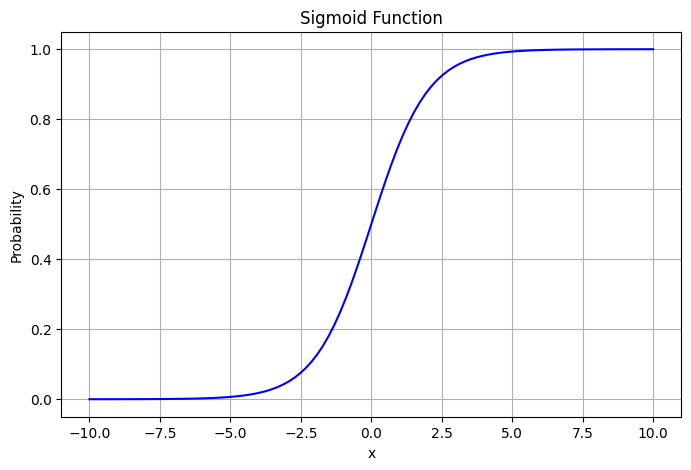

In [120]:
plt.figure(figsize=(8, 5))
x = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Sigmoid Function')
plt.grid(True)
plt.plot(x, sigmoid(x), color='b')
plt.show()

The hypothesis function in logistic regression computers the linear combination of the feature matrix $X$ and the weight vector $W$, and then applies the sigmoid function to squash the output into a range between 0 and 1. Given a feature matrix $X$ and weight vector $W$, we can compute the predicted probabilities as follows:

\begin{align*}
z = X \cdot W = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n
\end{align*}

where $w_0$ is the bias and $w_1$, $w_2$, ..., $w_1$ are the weights for the features.

For example, suppose we have the following matrices:

\begin{align*}
&X = \begin{bmatrix} 1 & 2 \\ 1 & 3 \\ 1 & 4 \end{bmatrix} \\
&W = \begin{bmatrix} -1 \\ 0.5 \end{bmatrix}
\end{align*}

The linear combination $z$ for each sample in %X% is calculated as:
\begin{align*}
z = X \cdot W = \begin{bmatrix} 1 & 2 \\ 1 & 3 \\ 1 & 4 \end{bmatrix} \cdot \begin{bmatrix} -1 \\ 0.5 \end{bmatrix} = \begin{bmatrix} 0 \\ 0.5 \\ 1 \end{bmatrix}
\end{align*}


Applying the sigmoid function to $z$ yields the predicted probabilities:

\begin{align*}
h(X) = \sigma (z) = \begin{bmatrix} \dfrac{1}{1+e^{0}} \\ \dfrac{1}{1+e^{-0.5}} \\ \dfrac{1}{1+e^{-1}} \end{bmatrix} \thickapprox \begin{bmatrix} 0.5 \\ 0.622 \\ 0.731 \end{bmatrix}
\end{align*}

In [121]:
# Hypothesis function with sigmoid activation
def hypothesis(X: np.array, W: np.array) -> np.array:
    return sigmoid(np.dot(X, W))

In [122]:
X_example = np.array([[1, 2],
                   [1, 3],
                   [1, 4]])
W_example = np.array([-1,
                   0.5])
print(f"Probabilities for each sample: {hypothesis(X_example, W_example)}")

Probabilities for each sample: [0.5        0.62245933 0.73105858]


## 8. Loss Function (BCE) <a class="anchor" id="content8"></a>


In logistic regression, the Binary Cross-Entropy loss function is used to measure the error between the true labels $y$ and the predicted probabilities $\hat y$. The loss function is defined as:

\begin{align*}
L = - \dfrac{1}{n} \sum_{i=1}^{n} y_{i} \log(\hat y_{i}) + (1-y_{i}) \log(1- \hat y_{i})
\end{align*}

In [123]:
# Binary cross-entropy loss function
def calculate_loss_BCE(y: np.array, y_pred: np.array, n: int) -> float:
    return - (1 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

## 9. Gradient Descent (Logistic) <a class="anchor" id="content9"></a>

Before computing the optimised weights using gradient descent, we need to calculate the partial derivatives of the binary cross entrophy with respect to the weights $W$. The gradient of the loss function is given by:

\begin{align*}
\dfrac{\partial L}{\partial W} = \dfrac{1}{n} (\hat y - y) \cdot X^{T}
\end{align*}

* $n$ is the number of samples in the dataset.
* $y$ is the actual value.
* $\hat y$ is the predicted value.
* $X^{T}$ is the transpose of the feature matrix $X$.

In [124]:
# ! Derivative of cost function L
def derivative_BCE(X: np.array, y: np.array, y_pred: np.array, n: int) -> float:
    dL_dW: float = (1/n) * np.dot(X.T, (y_pred - y))
    return dL_dW

We update the weights in each epoch of gradient descent to optimise the weights $W$ with the learning rate $\alpha$ as follows:

\begin{align*}
W = W - \alpha \cdot \dfrac{\partial L}{\partial W}
\end{align*}

By iteratively applying this update rule, the model minimise the binary cross-entropy loss and improves its predictions over epoch.


In [125]:
# Gradient descent for logistic regression
def gradient_descent_logistic(X: np.array, y: np.array, W: np.array,
                              alpha: float, epochs: int, n: int) -> tuple[np.array, np.array]:
    loss:list[float] = []
    for epoch in range(epochs):
        y_pred: np.array = hypothesis(X, W)
        dL_dW: float = derivative_BCE(X, y, y_pred, n)
        W -= alpha * dL_dW
        loss.append(calculate_loss_BCE(y, y_pred, n))
    return W, np.array(loss)

Let's initialise the weight vector $W$ with arbitrary values and execute `gradient_descent_logistic()` using a learning rate $\alpha$ of 0.001 for 5000 epochs.

In [126]:
# Initialise weights and hyperparameteres
W = np.array([-10, 0.2, 0.2])[:, np.newaxis]
alpha = 0.001
epochs = 5000
n = len(y_lgs)

W_optimised, loss_BCE = gradient_descent_logistic(
    X_lgs, y_lgs, W, alpha, epochs, n)
print(f"Optimised weights after {epochs} epochs:\n {W}")

Optimised weights after 5000 epochs:
 [[-10.07002079]
 [  0.08601621]
 [  0.07977089]]


As the training progresses, we can observe a consistent decrease in the loss value over the epochs. This indicates that the model is learning by minimising the error, the difference between the predicted and actual values. 

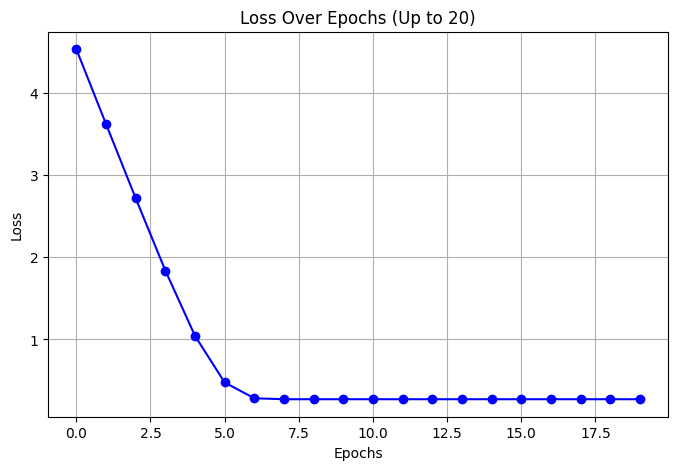

In [127]:
plt.figure(figsize=(8, 5))
plt.plot(loss_BCE[:20], marker='o', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Up to 20)')
plt.grid(True)
plt.show()

Now, we visualise the data to illustrate how the logistic regression model classifies the data and separates the classes using a decision boundary. The decision boundary is a linear function derived from the model's hypothesis that separates the input space into two distinct regions. Typically, it represents the set of points where the model predicts a probability of 50%. 

We compute the model's predictions using the optimised weight vector `W_optimised`. If the predicted probability is greater than or equal to 0.5, the data point is classified as 1; otherwise it is classify as 0. For instance, given $y_{pred} = [0.85,0.15,0.65,0.30]$, the result would be $[1, 0, 1, 0]$. By calculating these predictions, we can also compute the accuracy to evaluate the model's performance.

In [128]:
# Make predictions
threshold = 0.5
y_pred = hypothesis(X_lgs, W_optimised)
y_pred_labels = (y_pred >= threshold).astype(int)
print(f"Accuracy: {np.mean(y_pred_labels == y_lgs) * 100:.2f}%")

Accuracy: 91.00%


In [129]:
def draw_decision_boundary(W:np.array, x_1:np.array) -> np.array:
    return -(W[0] + W[1] * x_1) / (W[2])

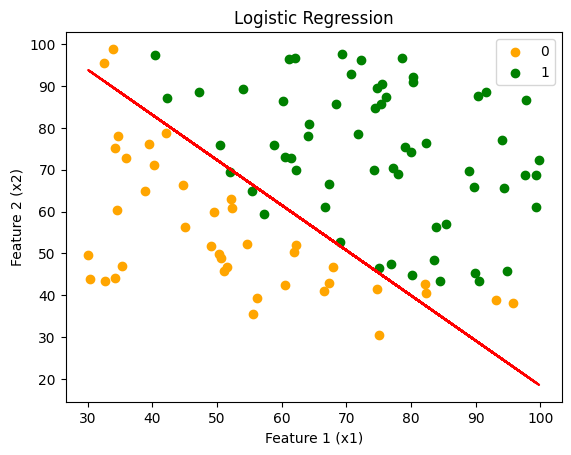

In [130]:
def draw_decision_boundary(W:np.array, x_1:np.array) -> np.array:
    return -(W[0] + W[1] * x_1) / (W[2])

plt.scatter(x=x_1_lgs[y_lgs.flatten() == 0], y=x_2_lgs[y_lgs.flatten() == 0], label='0', color='orange')
plt.scatter(x=x_1_lgs[y_lgs.flatten() == 1], y=x_2_lgs[y_lgs.flatten() == 1], label='1', color='green')
plt.plot(x_1_lgs, draw_decision_boundary(W, x_1_lgs), color="red")
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Logistic Regression')
plt.legend()
plt.show()